In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://www.imdb.com/chart/top/"
HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E14'}

In [3]:
page = requests.get(url, headers=HEADERS)

In [4]:
soup = BeautifulSoup(page.text, "html.parser")

In [17]:
movies = soup.findAll("div", class_='sc-479faa3c-0 fMoWnh cli-children')

data = []
for movie in movies:
  title = movie.find("h3", class_="ipc-title__text")
  year = movie.find("div", class_="jXgjdT").contents[0]
  duration = movie.find("div", class_="jXgjdT").contents[1]
  rating = movie.find("span", class_="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating").contents[1]
  nb_rating = movie.find("span", class_="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating").contents[2]

  if title and year and duration and rating and nb_rating:
    title = ".".join(title.text.strip().split(".")[1:]).strip()
    

    duration_split = duration.text.strip().split("h")
    if len(duration_split) == 1:
      duration_m = 0
    elif 'm' in duration_split[1]:
      duration_m = duration_split[1].split("m")[0]
    else:
      duration_m = 0

    duration_h = duration_split[0]
    int_m = int(duration_m)

    if 'm' in duration_h:
      int_m += int(duration_split[0].split("m")[0])
      duration_h = 0
    
    int_h = int(duration_h)
    duration =  int_h * 60 + int_m

    nb_rating = nb_rating.text.replace("(", "").replace(")", "")
    if "M" in nb_rating:
      nb_rating = float(nb_rating.replace("M", "")) * 1000000
    elif "K" in nb_rating:
      nb_rating = float(nb_rating.replace("K", "")) * 1000
    else:
      nb_rating = float(nb_rating)

    data.append({
      'title': title,
      'year': year.text.strip(),
      'duration': duration,
      'rating': float(rating),
      'nb_rating': nb_rating
    })

df = pd.DataFrame(data)
df

,title,year,duration,rating,nb_rating
0,The Shawshank Redemption,1994,142,9.3,2800000.0
1,The Godfather,1972,175,9.2,2000000.0
2,The Dark Knight,2008,152,9.0,2800000.0
3,The Godfather Part II,1974,202,9.0,1300000.0
4,12 Angry Men,1957,96,9.0,841000.0
...,...,...,...,...,...
245,Les quatre cents coups,1959,99,8.1,125000.0
246,Aladdin,1992,90,8.0,454000.0
247,Dances with Wolves,1990,181,8.0,284000.0
248,Drishyam,2015,163,8.2,92000.0


In [30]:
movies_year = df.groupby('year').size()
movies_year

year
1921    1
1924    1
1925    1
1926    1
1927    1
       ..
2019    6
2020    2
2021    2
2022    1
2023    2
Length: 87, dtype: int64

In [31]:
year_mean_grade = df.groupby('year')["rating"].mean()
year_mean_grade

year
1921    8.20
1924    8.20
1925    8.10
1926    8.10
1927    8.30
        ... 
2019    8.30
2020    8.25
2021    8.50
2022    8.30
2023    8.60
Name: rating, Length: 87, dtype: float64

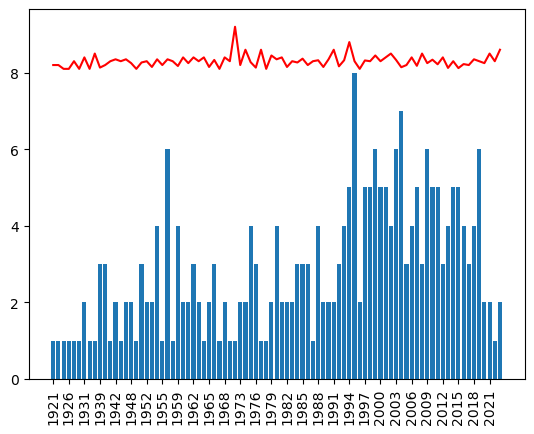

In [32]:
plt.bar(movies_year.index, movies_year.values)
plt.xticks(movies_year.index[::3], rotation=90)
plt.show()

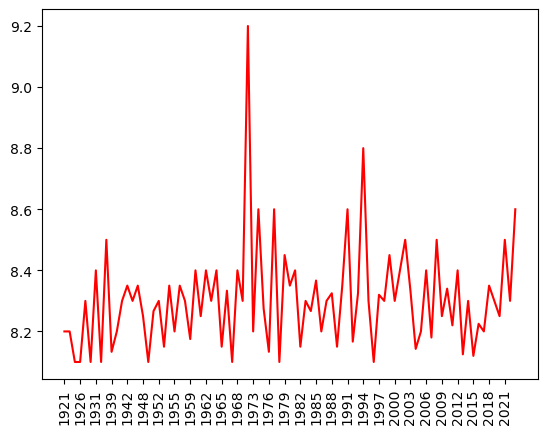

In [33]:
plt.plot(year_mean_grade.index, year_mean_grade.values, "r")
plt.xticks(year_mean_grade.index[::3], rotation=90)
plt.show()